<a href="https://colab.research.google.com/github/atishghoshdastidar2014/Baisc-of-Python-/blob/main/Water_Quality_Test_using_Cassification_KNN%2C_Randome_Forest_%2C_SVM_%2C_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prepare a Dict FIle

import pandas as pd


In [ ]:
# Create a dictionary with water quality statistics
data = {
    "City": ["Kolkata", "Kolkata", "Kolkata", "Bangalore", "Bangalore", "Bangalore", "Delhi", "Delhi", "Delhi"],
    "Quality": ["Fit for Drink", "Needs Purification", "Not fit for Drink",
                "Fit for Drink", "Needs Purification", "Not fit for Drink",
                "Fit for Drink", "Needs Purification", "Not fit for Drink"],
    "pH": [7.2, 6.5, 4.3, 7.5, 6.8, 4.7, 7.0, 6.2, 4.5],
    "Turbidity": [0.5, 2.3, 6.5, 0.3, 1.8, 5.9, 0.7, 2.0, 6.2],
    "E_Coli": [0, 15, 150, 0, 10, 120, 0, 20, 140],
    "Lead": [5, 25, 100, 4, 20, 90, 6, 22, 95]
}


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data)


In [ ]:
# Save to CSV
df.to_csv("water_quality.csv", index=False)

In [ ]:
# Step 2: Load the CSV and Encode Labels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the data
df = pd.read_csv("/content/water_quality.csv")

In [ ]:
# Encode categorical labels
city_encoder = LabelEncoder()
quality_encoder = LabelEncoder()

df['City'] = city_encoder.fit_transform(df['City'])
df['Quality'] = quality_encoder.fit_transform(df['Quality'])


In [ ]:
# Prepare features and target variable
X = df.drop('Quality', axis=1)
y = df['Quality']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict and calculate efficiency
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Step 3: Generate Bar Charts for Each City

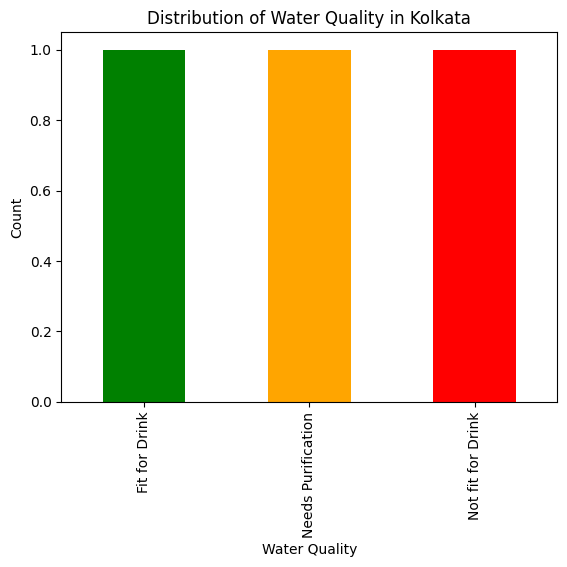

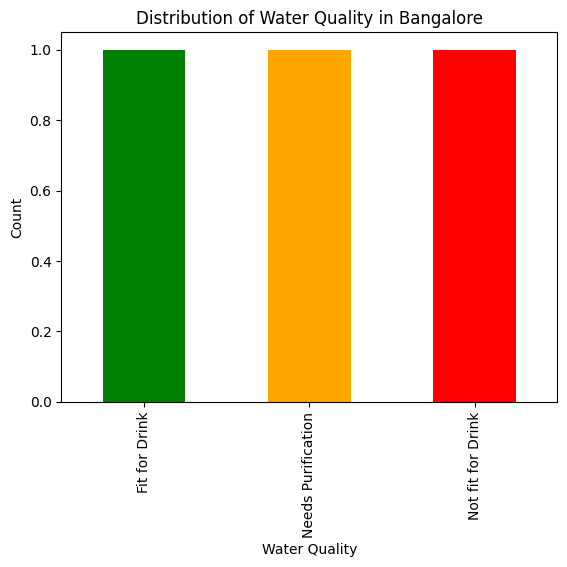

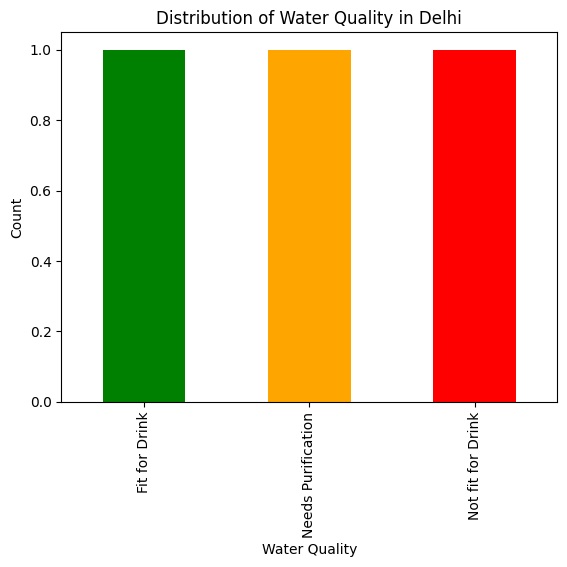

In [ ]:
import matplotlib.pyplot as plt

# Decode labels for visualization
df['City'] = city_encoder.inverse_transform(df['City'])
df['Quality'] = quality_encoder.inverse_transform(df['Quality'])

# List of cities
cities = df['City'].unique()

# Create bar charts for each city
for city in cities:
    city_data = df[df['City'] == city]
    city_data['Quality'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
    plt.title(f'Distribution of Water Quality in {city}')
    plt.xlabel('Water Quality')
    plt.ylabel('Count')
    plt.xticks([0, 1, 2], ['Fit for Drink', 'Needs Purification', 'Not fit for Drink'])
    plt.show()

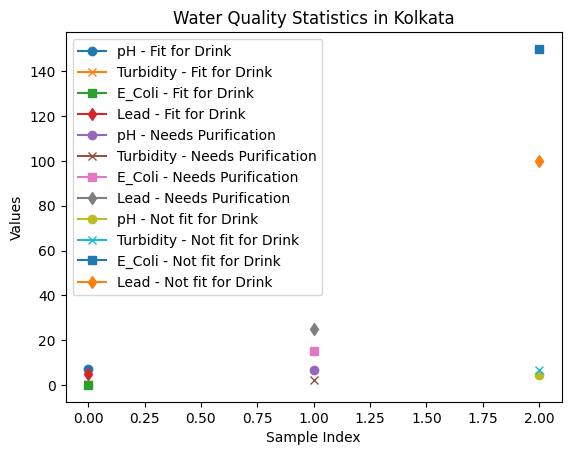

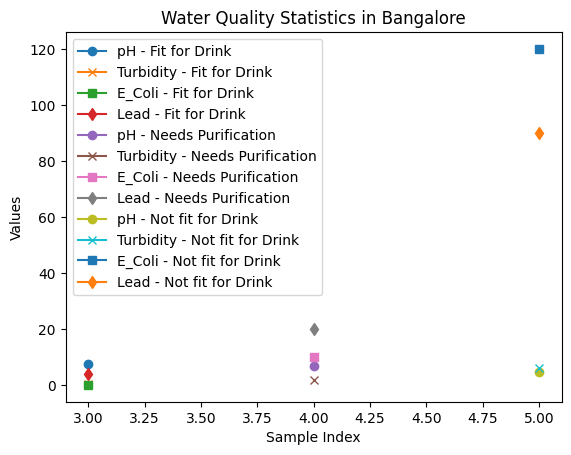

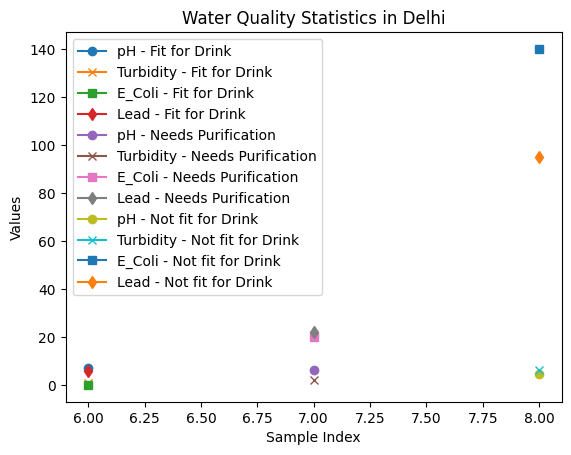

In [ ]:
# Create comparative line charts for each city
for city in cities:
    city_data = df[df['City'] == city]
    for quality in city_data['Quality'].unique():
        subset = city_data[city_data['Quality'] == quality]
        plt.plot(subset.index, subset['pH'], marker='o', label=f'pH - {quality}')
        plt.plot(subset.index, subset['Turbidity'], marker='x', label=f'Turbidity - {quality}')
        plt.plot(subset.index, subset['E_Coli'], marker='s', label=f'E_Coli - {quality}')
        plt.plot(subset.index, subset['Lead'], marker='d', label=f'Lead - {quality}')

    plt.title(f'Water Quality Statistics in {city}')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()